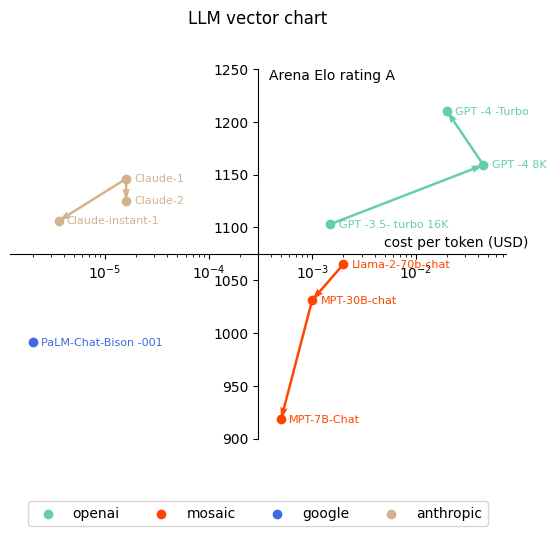

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points_and_arrows(data, arrows):
    colors = {'anthropic': 'tan', 'google': 'royalblue', 'mosaic': 'orangered', 'openai': 'mediumaquamarine'}

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot quiver arrows with adjusted width and axis limits
    for [old, new] in arrows:
        p1 = (data[old]['cost per token (USD)'], data[old]['Arena Elo rating A'])
        p2 = (data[new]['cost per token (USD)'], data[new]['Arena Elo rating A'])
        color = colors[data[old]['company/provider']]
        arrow = (p2[0] - p1[0], p2[1] - p1[1])
        ax.quiver(*p1, *arrow, color=color, scale=1, scale_units='xy', angles='xy', label=None,
                   width=0.005, headwidth=3, headlength=5)

    # Set the spines according to the provided specifications
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Plot points
    for key, entry in data.items():
        px = entry['cost per token (USD)']
        py = entry['Arena Elo rating A']
        color = colors[entry['company/provider']]
        label = key

        ax.scatter(px, py, color=color, label=entry['company/provider'])
        ax.text(px * 1.2, py, label, color=color, ha='left', va='center', fontsize=8)

    return fig, ax


# Example data
data = {
    'Claude-instant-1': {'company/provider': 'anthropic', 'cost per token (USD)': 0.00000357, 'Arena Elo rating A': 1106},
    'Claude-2': {'company/provider': 'anthropic', 'cost per token (USD)': 0.000016, 'Arena Elo rating A': 1125},
    'Claude-1': {'company/provider': 'anthropic', 'cost per token (USD)': 0.000016, 'Arena Elo rating A': 1146},
    'PaLM-Chat-Bison -001': {'company/provider': 'google', 'cost per token (USD)': 0.000002, 'Arena Elo rating A': 991},
    'MPT-7B-Chat': {'company/provider': 'mosaic', 'cost per token (USD)': 0.0005, 'Arena Elo rating A': 918},
    'MPT-30B-chat': {'company/provider': 'mosaic', 'cost per token (USD)': 0.001, 'Arena Elo rating A': 1031},
    'Llama-2-70b-chat': {'company/provider': 'mosaic', 'cost per token (USD)': 0.002, 'Arena Elo rating A': 1065},
    'GPT -3.5- turbo 16K': {'company/provider': 'openai', 'cost per token (USD)': 0.0015, 'Arena Elo rating A': 1103},
    'GPT -4 8K': {'company/provider': 'openai', 'cost per token (USD)': 0.045, 'Arena Elo rating A': 1159},
    'GPT -4 -Turbo': {'company/provider': 'openai', 'cost per token (USD)': 0.02, 'Arena Elo rating A': 1210}
}

arrows = [
    ['Claude-1', 'Claude-2'],
    ['Claude-1', 'Claude-instant-1'],
    ['GPT -3.5- turbo 16K', 'GPT -4 8K'],
    ['GPT -4 8K', 'GPT -4 -Turbo'],
    ['Llama-2-70b-chat', 'MPT-30B-chat'],
    ['MPT-30B-chat', 'MPT-7B-Chat'],
]



# Plot points and arrows
fig, ax = plot_points_and_arrows(data, arrows)

# Set labels and title
ax.set_xscale('log')
ax.set_xlabel('cost per token (USD)')
ax.set_ylabel('Arena Elo rating A', rotation=0, va='top')
ax.set_ylim(900,1250)
ax.yaxis.set_label_coords(0.65, 1.0)
ax.xaxis.set_label_coords(0.9,0.55)

ax.set_title('LLM vector chart', y=1.1)

# Redefine the handles to customize the legend
handles, labels = fig.gca().get_legend_handles_labels()

# Create a new legend with unique labels
unique_labels = set(labels)
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels, bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=len(unique_labels))


